<a href="https://colab.research.google.com/github/jirvingphd-colab/example-colab-upload/blob/main/Appendix_Intro_to_CNNs_070620FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

- 10/28/20
- online-ds-ft-070620

## STUDY GROUP RESOURCES


- [NOTEBOOK: This Notebook on Google Colab](https://drive.google.com/file/d/1rxkuydyd_wNdiuKh22-e6mr-zlsRVC1N/view?usp=sharing)
- [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- [POWERPOINT: of Human Visual System](https://github.com/jirvingphd/fsds_100719_cohort_notes/blob/master/bio_neural_networks.pptx)
- [VIDEO: Study Group Video Recording]()


## LEARNING OBJECTIVES



- Learn about the retina /human visual system
- Relate human to CNNS
- Discuss using colab/colab pro 
- Fitting, evaluating, saving CNNs
- Transfer Learning & Pre-trained Networks 

## Using Colab Pro 

In [1]:
#https://colab.research.google.com/notebooks/pro.ipynb
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Oct 30 15:20:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


## Installs & Imports

In [ ]:
import numpy as np
import tensorflow as tf

np.random.seed(321)
tf.random.set_seed(321)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys, glob


import datetime as dt
from sklearn import metrics
from tzlocal import get_localzone

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks, models, layers, optimizers, regularizers

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# Loading in the data

- [Google Drive Link to zip file](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- [Blog Post on Using Colab for ANNs](https://medium.com/datadriveninvestor/speed-up-your-image-training-on-google-colab-dc95ea1491cf)


In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/gdrive',force_remount=True)


Mounted at /gdrive


In [ ]:

def print_path(return_=False):
    """Prints the current working directory"""
    path = os.path.abspath(os.curdir)
    print("Current Directory = ",path)
    if return_:
        return path
        
print_path()

Current Directory =  /content


In [ ]:
## cd to root directory and then cd to above folder
%cd ~
%cd ..
print_path()

/root
/
Current Directory =  /


In [ ]:
def print_dir_contents(fpath=None):
    """Function to print the contents of the filepath provided.
    Defaults to the current directory"""
    if fpath is None:
        fpath = os.path.abspath(os.curdir)

    print(f"CONTENTS OF FOLDER: '{fpath}':")
    files = sorted(os.listdir(fpath))
    tab = '\n\t'
    print("\t"+tab.join(files))

In [ ]:
print_dir_contents()

CONTENTS OF FOLDER: '/':
	.dockerenv
	bin
	boot
	content
	datalab
	dev
	etc
	gdrive
	home
	lib
	lib32
	lib64
	media
	mnt
	opt
	proc
	root
	run
	sbin
	srv
	swift
	sys
	tensorflow-1.15.2
	tmp
	tools
	usr
	var


In [ ]:
## From the top-level directory, 
## LOCATION OF ZIP FILE
source_folder = r'/gdrive/My Drive/Datasets/'
print_dir_contents(source_folder)

CONTENTS OF FOLDER: '/gdrive/My Drive/Datasets/':
	COVID19
	Models
	Neuroscience
	arrivals.xlsx
	chest-xray-pneumonia-jmi.zip
	chest-xray-pneumonia.zip
	data.sqlite
	dogs-vs-cats
	dogs-vs-cats-sorted
	dogs-vs-cats-sorted.zip
	dogs-vs-catsexample_save.jpg
	kaggle_chest_xray.zip
	models
	pets_database.db
	planets.db
	titanic


In [ ]:
def find_zipfile(source_folder,ZIPFILE_STR = '*.zip'):
    """Modify the ZIPFILE_STR to change the search pattern for glob (default is '*.zip')"""
    files = glob.glob(source_folder+ ZIPFILE_STR,
                    recursive=True)
    

    if len(files)>1:
        print("[!] More than 1 file found:")
        for i,file in enumerate(files):
            print(f"{file} \t= File {i}")

        print('[!] Must set fpath = output[i] (where i is the file of interest)')
    else:
        # fpath = files[0]
        print('[i] Found 1 matching file:')
        print('\tMust set fpath = output[0]')
    return files

In [ ]:
## Modify the ZIPFILE_STR to change the search pattern for glob (default is '*.zip')
ZIPFILE_STR = '*sorted.zip'

files = find_zipfile(source_folder,ZIPFILE_STR)
source_file = files[0]
print(source_file)

[i] Found 1 matching file:
	Must set fpath = output[0]
/gdrive/My Drive/Datasets/dogs-vs-cats-sorted.zip



#### The following cells are very important.
- It will copy the zip file to the virtual machines root directory, unzip it, and then remove the zip file. 

In [ ]:
## Get the name of the zipfile without folder
zip_path = source_file
fname = zip_path.split('/')[-1]

!cp "{zip_path}" .

!unzip -q "{fname}" 
!rm "{fname}" 

In [ ]:
print_dir_contents()#'dogs-vs-cats-sorted')

CONTENTS OF FOLDER: '/':
	.dockerenv
	__MACOSX
	bin
	boot
	content
	datalab
	dev
	dogs-vs-cats-sorted
	etc
	gdrive
	home
	lib
	lib32
	lib64
	media
	mnt
	opt
	proc
	root
	run
	sbin
	srv
	swift
	sys
	tensorflow-1.15.2
	tmp
	tools
	usr
	var


## Preparing the Data with ImageDataGenerator & Flow From Directory

### Defining Folder Structure

In [ ]:
# change dataset_folder to match where you stored the files
base_folder ="dogs-vs-cats-sorted/" 

## Check contents of base folder
print_dir_contents(base_folder)

CONTENTS OF FOLDER: 'dogs-vs-cats-sorted/':
	.DS_Store
	single_prediction
	test_set
	training_set


In [ ]:
## Define train_folder and test_folder
train_folder = base_folder+"training_set/"
test_folder =  base_folder+"test_set/"

## Check contents of train_folder
print_dir_contents(train_folder)

CONTENTS OF FOLDER: 'dogs-vs-cats-sorted/training_set/':
	.DS_Store
	cats
	dogs


In [ ]:
## IF WE WANT TO USE A DENSE-LAYERS-ONLY MODEL, will need batch sizes as number of images
def get_num_images(train_folder,folders=['dogs','cats'],verbose=False):
    """Gets the total number of images from all folders listed"""
    num_images = 0
    for folder in folders:
        num_in_folder = len(os.listdir(train_folder+folder))
        
        if verbose:
            print(f"- There are {num_in_folder} images in {folder} folder.")
        num_images+=num_in_folder
    return num_images

### WE WANT TO GENERATE ENTIRE DATASET WITH the I.D.Gs.
## SO HERE WE CALCULATE HOW MANY IMAGES SHOULD BE IN EACH BATCH SIZE FOR THE GENERATOR
## Get the Number of total images for batch size 
NUM_TRAIN_IMGS = get_num_images(train_folder,verbose=True)
NUM_VAL_TEST_IMGS = get_num_images(test_folder,verbose=True)



- There are 4001 images in dogs folder.
- There are 4001 images in cats folder.
- There are 1001 images in dogs folder.
- There are 1001 images in cats folder.


In [ ]:
## Make validation split
VAL_SPLIT = 0.2

NUM_VAL_IMGS = round(NUM_VAL_TEST_IMGS*VAL_SPLIT)
NUM_TEST_IMGS = round(NUM_VAL_TEST_IMGS*(1-VAL_SPLIT))

print(f"Training images: {NUM_TRAIN_IMGS}")
print(f"Test images: {NUM_TEST_IMGS}")
print(f"Val images: {NUM_VAL_IMGS}")
NUM_TRAIN_IMGS,NUM_TEST_IMGS,NUM_VAL_IMGS

Training images: 8002
Test images: 1602
Val images: 400


(8002, 1602, 400)

In [ ]:
## MAKING IMAGE DATA GENERATORS FOR TRAIN TEST VAL
IMG_SIZE = (256,256)
# BATCH_SIZE = 528

## Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)#,
                                #    shear_range = 0.2, zoom_range = 0.2,
                                #    horizontal_flip = True)

test_val_datagen = ImageDataGenerator(rescale=1./255,
                                      validation_split=VAL_SPLIT)


In [ ]:
## Make Training Sets With All Images
training_set = train_datagen.flow_from_directory(train_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=NUM_TRAIN_IMGS)#BATCH_SIZE)                                          
                                                      

test_set = test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=NUM_TEST_IMGS,#BATCH_SIZE,
                                                    subset='training')  

val_set = test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=NUM_VAL_IMGS,
                                                    subset='validation')  

Found 8000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
## Make Training Sets With All Images
example_set = train_datagen.flow_from_directory(train_folder,
                                                      target_size=IMG_SIZE,
                                                     class_mode='binary',
                                                     batch_size=32)

Found 8000 images belonging to 2 classes.


In [ ]:
X_ex,y_ex = next(example_set)
y_ex

array([0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

In [ ]:
X_train,y_train = next(training_set)
X_test,y_test = next(test_set)
X_val,y_val = next(val_set)

[print(y.shape) for y in [y_train,y_test,y_val]]

(8000,)
(1600,)
(400,)


[None, None, None]

Label=1.0


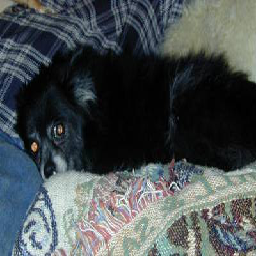

In [ ]:
i = np.random.choice(len(y_train))
print(f"Label={y_train[i]}")
array_to_img(X_train[i])

# Using CNNs

## Modeling Functions

In [ ]:
def plot_history(history, metric_list=['loss','acc']):
    """Plots keras training history"""
    ## Get History  as adf
    history_df = pd.DataFrame(history.history)
    ## PLotn all fo the metrics in history
   
    for metric in metric_list:
        history_df[[col for col in history_df.columns if metric in col]].plot(
        marker='o',ls=':')
        
    plt.suptitle('Training History')
    plt.show()

    return plt.gcf()


def make_fit_plot_model(build_fn,X_train,y_train,X_val,y_val, epochs=3,fit_kws={},binary=True,evaluate=True):
    """Builds, fits, and (optionally) evaluate a neural network created
    from the build_fn"""

    ## Print Start Time
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"

    print('---'*20)    
    print(f'[i] MODEL CREATED AT {start.strftime(fmt)}')
    print('---'*20)
    print()
    
    ## Use new functions to make model and plot history
    model = build_fn()
    history = model.fit(X_train,y_train, epochs=epochs,**fit_kws,
                          validation_data=(X_val,y_val))
    
    ## Print Total Time
    end = dt.datetime.now(tz=get_localzone())
    print(f'\n[!] Training Completed AT {end.strftime(fmt)}')
    # print()
    print(f"\n[i] Total Training Time: {end-start}")

    if evaluate:
        evaluate_model(model,history,X_test,y_test,binary=binary)

    return model,history
    

## Making a function for just evaluting not fitting
def evaluate_model(model,history,X_test,y_test,binary=True):

    ## Get Model history and plot
    # history = model.history
    plot_history(history)
    
    ## Get predictions
    y_hat_test = model.predict(X_test)

    if binary:
        y_hat_test = y_hat_test.round()
    else:
        y_hat_test = y_hat_test.argmax(axis=1)


    ## Print classification report
    print('---'*20)  
    print('---'*20)  
    print('[i] Classification Report')
    print(metrics.classification_report(y_test,y_hat_test))
    print('---'*20)  


    ## Get and PLot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_hat_test,
                                normalize='true')

    ax = sns.heatmap(cm, cmap='Blues',annot=True,square=True)
    ax.set(xlabel='Predicted Class',ylabel='True Class')

## Model 1

In [ ]:
(*IMG_SIZE,3)

(256, 256, 3)

In [ ]:
# Part 1 - Building the CNN
def make_cnn1():
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Conv2D(64, (3, 3),
                                input_shape = ((*IMG_SIZE,3)),
                                activation = 'relu'))

    classifier.add(Conv2D(64, (3, 3),
                        input_shape = ((*IMG_SIZE,3)),
                        activation = 'relu'))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Adding a second convolutional layer
    classifier.add(Conv2D(32, (3, 3),
                        activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Step 3 - Flattening
    classifier.add(Flatten())

    # Step 4 - Full connection
    classifier.add(Dense(units = 64, activation = 'relu'))

    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    # Compiling the CNN
    classifier.compile(optimizer = 'adam', 
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
    print()
    display(classifier.summary())
    return classifier


------------------------------------------------------------
[i] MODEL CREATED AT 10/29/20 - 20:58:02 PM
------------------------------------------------------------


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 32)      18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten

None

Epoch 1/3
250/250 [==============================] - 15s 58ms/step - loss: 0.7026 - accuracy: 0.5038 - val_loss: 0.6882 - val_accuracy: 0.5700
Epoch 2/3
250/250 [==============================] - 14s 57ms/step - loss: 0.6938 - accuracy: 0.5346 - val_loss: 0.6909 - val_accuracy: 0.5225
Epoch 3/3
250/250 [==============================] - 14s 58ms/step - loss: 0.6712 - accuracy: 0.5926 - val_loss: 0.6582 - val_accuracy: 0.6350

[!] Training Completed AT 10/29/20 - 20:58:54 PM

[i] Total Training Time: 0:00:52.295047


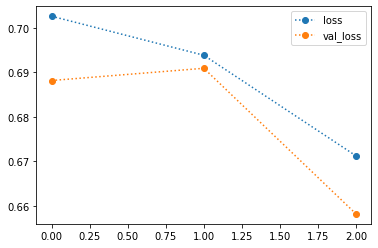

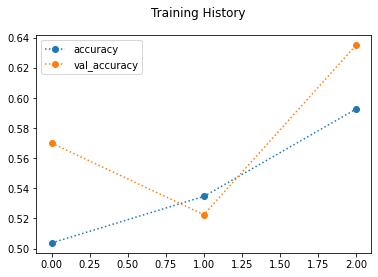

------------------------------------------------------------
------------------------------------------------------------
[i] Classification Report
              precision    recall  f1-score   support

         0.0       0.64      0.51      0.56       800
         1.0       0.59      0.71      0.64       800

    accuracy                           0.61      1600
   macro avg       0.61      0.61      0.60      1600
weighted avg       0.61      0.61      0.60      1600

------------------------------------------------------------


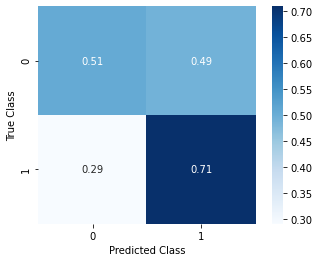

In [ ]:


# # Part 2 - Fitting the CNN to the images
cnn1,hist = make_fit_plot_model(make_cnn1,X_train,y_train,X_val,y_val)

# Keras Callbacks



- [Official Callback documentation](https://keras.io/callbacks/)
- CallBacks You'll Definitely Want to Use
 - `keras.callbacks.ModelCheckpoint`
 - `keras.callbacks.EarlyStopping`

- Callbacks worth further exploration
 - `keras.callbacks.callbacks.LearningRateScheduler`
 - `keras.callbacks`

In [ ]:
print_dir_contents('/gdrive/My Drive/Modeling')

CONTENTS OF FOLDER: '/gdrive/My Drive/Modeling':
	cats_vs_dogs


### Adding callbacks

In [ ]:
MODEL_FPATH = r'/gdrive/My Drive/Modeling/cats_vs_dogs/'
os.makedirs(MODEL_FPATH,exist_ok=True)
print_dir_contents(MODEL_FPATH)

CONTENTS OF FOLDER: '/gdrive/My Drive/Modeling/cats_vs_dogs/':
	CNN1_model.json
	CNN1_weights.h5
	example.hdf5
	example_cnn.hdf
	model.json
	weights-improvement-01-0.50.hdf5
	weights-improvement-01-0.51.hdf5
	weights-improvement-01-0.65.hdf5
	weights-improvement-01-0.66.hdf5
	weights-improvement-01-0.69.hdf5
	weights-improvement-01-0.70.hdf5
	weights-improvement-02-0.62.hdf5
	weights-improvement-02-0.63.hdf5
	weights-improvement-02-0.64.hdf5
	weights-improvement-03-0.59.hdf5
	weights-improvement-03-0.60.hdf5
	weights-improvement-03-0.64.hdf5
	weights-improvement-03-0.71.hdf5
	weights-improvement-04-0.60.hdf5
	weights-improvement-04-0.63.hdf5
	weights-improvement-05-0.55.hdf5
	weights-improvement-06-0.46.hdf5
	weights-improvement-07-0.44.hdf5
	weights-improvement-07-0.51.hdf5
	weights-improvement-08-0.49.hdf5
	weights-improvement-09-0.46.hdf5


In [ ]:
# checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

def create_checkpoint(monitor='val_accuracy',model_subfolder=MODEL_FPATH):
    """Creates a ModelCheckpoint callback
   filepath =  model_subfolder+ "weights-improvement-{epoch:02d}-{" + monitor + ":.2f}.hdf5"
    """
    filepath=model_subfolder+"weights-improvement-{epoch:02d}-{"+monitor+":.2f}.hdf5"

    checkpoint = ModelCheckpoint(filepath, monitor=monitor, verbose=1,
                                 save_best_only=True, mode='auto')
    return checkpoint


def create_early_stopping(monitor = 'val_accuracy',min_delta = 0.01, patience = 3,
                          verbose = 1, restore_best_weights = True):
    """Creates an EarlyStopping callback"""
    args = locals()
    return EarlyStopping(**args)

def create_csvlogger(filename):
    return CSVLogger(filename, separator=',', append=False)


def get_callbacks(checkpoints=True, early_stopping=True, modeling_folder=MODEL_FPATH,
                  monitor_checkpoint='val_loss',monitor_stopping='val_loss',
                  min_delta = 0.01, patience = 3, verbose = 1, restore_best_weights = True):
    """Returns a list of callbacks containing ModelCheckpoint (if checkpoints==True),
    EarlyStopping (if early_stopping==True)"""
    callbacks = []
    if checkpoints:
        callbacks.append( create_checkpoint(monitor=monitor_checkpoint,
                                            model_subfolder=modeling_folder))
    
    if early_stopping:
        callbacks.append( create_early_stopping(monitor=monitor_stopping, min_delta=min_delta,
                                                patience=patience,verbose=verbose,
                                                restore_best_weights=restore_best_weights))
    return callbacks

get_callbacks()

## Model 1 + Callbacks



In [ ]:

callbacks_list = get_callbacks(monitor_checkpoint='val_loss',
                               monitor_stopping='val_loss')
callbacks_list 


------------------------------------------------------------
[i] MODEL CREATED AT 10/29/20 - 22:15:45 PM
------------------------------------------------------------


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 124, 124, 32)      18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_6 (Flatten

None

Epoch 1/20
250/250 [==============================] - ETA: 0s - loss: 0.7197 - accuracy: 0.5244
Epoch 00001: val_loss improved from inf to 0.68294, saving model to /gdrive/My Drive/Modeling/cats_vs_dogs/weights-improvement-01-0.68.hdf5
250/250 [==============================] - 16s 64ms/step - loss: 0.7197 - accuracy: 0.5244 - val_loss: 0.6829 - val_accuracy: 0.5700
Epoch 2/20
250/250 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5872
Epoch 00002: val_loss did not improve from 0.68294
250/250 [==============================] - 15s 60ms/step - loss: 0.6925 - accuracy: 0.5872 - val_loss: 0.6848 - val_accuracy: 0.5469
Epoch 3/20
250/250 [==============================] - ETA: 0s - loss: 0.6039 - accuracy: 0.6837
Epoch 00003: val_loss improved from 0.68294 to 0.66978, saving model to /gdrive/My Drive/Modeling/cats_vs_dogs/weights-improvement-03-0.67.hdf5
250/250 [==============================] - 15s 61ms/step - loss: 0.6039 - accuracy: 0.6837 - val_loss: 0.6698 -

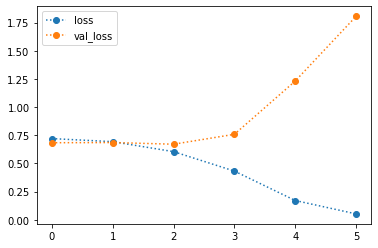

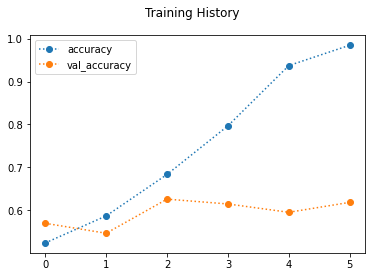

------------------------------------------------------------
------------------------------------------------------------
[i] Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63       800
         1.0       0.63      0.61      0.62       800

    accuracy                           0.63      1600
   macro avg       0.63      0.63      0.63      1600
weighted avg       0.63      0.63      0.63      1600

------------------------------------------------------------


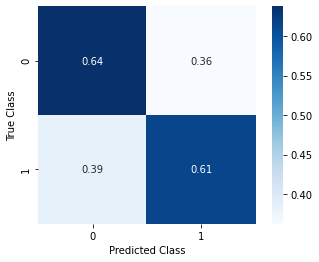

In [ ]:
cnn1,hist = make_fit_plot_model(make_cnn1,X_train,y_train,
                                X_test,y_test,epochs=20,
                                fit_kws=dict(callbacks=get_callbacks()))

## Model 3: Adding CNN from Student Capstone
- [Devin Belden](https://colab.research.google.com/drive/1YvckYAeV2Qtwk5vz0zlmHX7wO3d-uS7o?usp=sharing)

------------------------------------------------------------
[i] MODEL CREATED AT 10/29/20 - 22:27:04 PM
------------------------------------------------------------

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 123, 123, 64)      51264     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_15 (Dropou

None

Epoch 1/30
249/250 [============================>.] - ETA: 0s - loss: 0.7179 - acc: 0.5187
Epoch 00001: val_loss improved from inf to 0.69536, saving model to /gdrive/My Drive/Modeling/cats_vs_dogs/weights-improvement-01-0.70.hdf5
250/250 [==============================] - 9s 34ms/step - loss: 0.7178 - acc: 0.5184 - val_loss: 0.6954 - val_acc: 0.4975
Epoch 2/30
249/250 [============================>.] - ETA: 0s - loss: 0.6762 - acc: 0.5550
Epoch 00002: val_loss improved from 0.69536 to 0.63807, saving model to /gdrive/My Drive/Modeling/cats_vs_dogs/weights-improvement-02-0.64.hdf5
250/250 [==============================] - 10s 38ms/step - loss: 0.6763 - acc: 0.5550 - val_loss: 0.6381 - val_acc: 0.6275
Epoch 3/30
249/250 [============================>.] - ETA: 0s - loss: 0.6424 - acc: 0.6044
Epoch 00003: val_loss improved from 0.63807 to 0.61974, saving model to /gdrive/My Drive/Modeling/cats_vs_dogs/weights-improvement-03-0.62.hdf5
250/250 [==============================] - 8s 31ms/ste

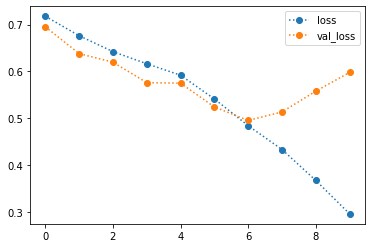

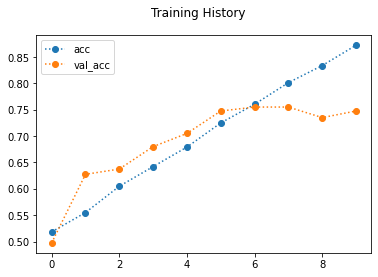

------------------------------------------------------------
------------------------------------------------------------
[i] Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       800
         1.0       0.74      0.74      0.74       800

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600

------------------------------------------------------------


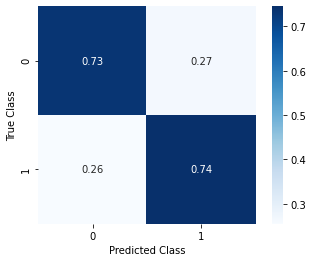

In [ ]:
def make_cnn_devin():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(*IMG_SIZE,3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    # model.add(layers.MaxPooling2D((2, 2)))
    # model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    
    # JMI
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    # model.add(layers.Dense(256, activation='relu'))
    # model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['acc'])
    display(model.summary())
    return model


cnn2,hist2 = make_fit_plot_model(make_cnn_devin,X_train,y_train,X_val,y_val,
                                epochs=30,fit_kws=dict(
                                    callbacks=get_callbacks()
                                ))

# BOOKMARK - SAVING AND LOADING MODELS

In [ ]:
# MODEL_FPATH+'best_cnn.hdf5'

In [ ]:
# ## SAVING THE FULL MODEL
# cnn_dev[0].save(MODEL_FPATH+'example.hdf5')

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model(MODEL_FPATH+'example.hdf5')
# model.summary()

In [ ]:
# from tensorflow.keras.models import load_model
# cnn_loaded = load_model(MODEL_FPATH+'example_cnn.hdf')
# cnn_loaded.predict(X_test)
# history = cnn_loaded.fit(X_train,y_train,epochs=2,
#                            validation_data=(X_val,y_val))

In [ ]:
# ## Saving the Model Weights
# model_name = 'CNN1'
# weights_fname = MODEL_FPATH + f"{model_name}_weights.h5"
# cnn1.save_weights(weights_fname)

In [ ]:
# from tensorflow.keras.models import model_from_json


# # Model reconstruction from JSON file
# with open(model_fname, 'r',encoding="utf8") as f:
#     model2 = model_from_json(f.read())

# # Load weights into the new model
# model2.load_weights(weights_fname)
# display(model2.summary())
# model2.predict(X_test)

# LIME

## Lime 

- https://github.com/expectopatronum/code-snippets-blog/blob/master/python/201808_catdog_classifier_lime/analyse-cat-dog-classifier.ipynb

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 9.4MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=a142bda5b90841769fec3dfec46b22aadadeac220f5f92a81b1bc3639914e5e0
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
class_lookup = {v:k for k,v in training_set.class_indices.items()}
class_lookup

{0: 'cats', 1: 'dogs'}

In [ ]:
import lime
from lime import lime_image
from lime import lime_base

from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
lime_image.LimeImageExplainer?

Image 2660 = cats
- Model Predicted dogs


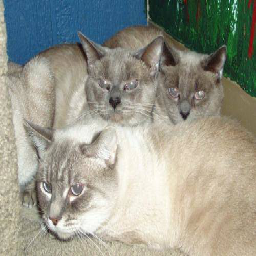

In [ ]:
## Grabbing a random training image and label
i = np.random.choice(range(len(y_train)))
label = y_train[i]
img = X_train[i]

## Getting model prediction 
pred = cnn1.predict(np.array([img]))
pred_class = int(pred.round())


## Printing the true class, predicted class, and show image
print(f"Image {i} = {class_lookup[int(label)]}")
print(f"- Model Predicted {class_lookup[pred_class]}")
array_to_img(img)

In [ ]:
## Make an explainer
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(img, cnn2.predict, top_labels=2,
                                         hide_color=None, num_samples=2000)

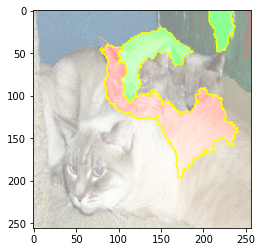

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False,
                                            num_features=5)
                                            # hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


# OLDER CODE

### def save_model

In [ ]:
# print_dir_contents('/gdrive/My Drive/Modeling/')

In [ ]:
# def save_model(model,model_subfolder = r'/gdrive/My Drive/Modeling/cats_vs_dog/',
#                base_modelname = 'CNN_cat_dog_02142020', as_json=True,
#                return_fpaths=True,verbose=True):
#     import os
#     ## To save to Gdrive, must first chdir to My Drive (so there's no spaces in fpath)
#     curdir = os.path.abspath(os.curdir)

#     # gdrive_folder =r'/gdrive/My Drive/'
#     # model_subfolder = 'Datasets/Models/cat_vs_dog/'

#     try:
#         os.chdir(gdrive_folder)
#         os.makedirs(model_subfolder,exist_ok=True)
#     except Exception as e:
#         print(f'ERROR: {e}')

#     # os.listdir(model_subfolder)
#     # https://jovianlin.io/saving-loading-keras-models/
#     try:
#         weight_fpath = model_subfolder+base_modelname+'_weights.h5'
#         model.save_weights(weight_fpath, overwrite=True)

#         if as_json:
#             model_fpath = model_subfolder+base_modelname+'_model.json'
#             # Save the model architecture
#             with open(model_fpath, 'w') as f:
#                 f.write(model.to_json())
#         else:
#             model_fpath = model_subfolder+base_modelname+'_model.h5'
#             model.save(model_fpath)
#         if verbose: 
#             print(f"[io] Model architecture saved as {model_fpath}")
#             print(f"[io] Model weights saved as {weight_fpath}")
#         else:
#             print(f"[io] Successfully saved model.")

#     except Exception as e:
#         import warnings
#         warnings.warn(f"ERROR SAVING: {e}")
#     if return_fpaths:
#         return model_fpath, weight_fpath



# def load_model(model_fpath,weight_fpath=None,as_json=True):
#     from keras.models import model_from_json
#     if (as_json == True) & (weight_fpath is None):
#         raise Exception('If using as_json=True, must provide ')

#     # Model reconstruction from JSON file
#     with open(model_fpath, 'r',encoding="utf8") as f:
#         model2 = model_from_json(f.read())

#     # Load weights into the new model
#     model2.load_weights(weight_fpath)
#     display(model2.summary())
#     return model2

# # model_fpath,weight_fpath = save_model(model)
# # model_loaded = load_model(model_fpath,weight_fpath)

# Making Modeling functions for gridsearching

In [ ]:
# def build_model(SHAPES,filter_size=(3,3), pool_size=(2,2),dropout=True): 
#     vars_ = locals()
#     print(f'[i] MODEL BUILT USING:\n\t{vars_}')
#     # Part 1 - Building the CNN

#     # Importing the Keras libraries and packages
#     from tensorflow.keras.models import Sequential
#     from tensorflow.keras.layers import Conv2D
#     from tensorflow.keras.layers import MaxPooling2D
#     from tensorflow.keras.layers import Flatten
#     from tensorflow.keras.layers import Dense

#     # Initialising the CNN
#     classifier = Sequential()

#     # Step 1 - Convolution
#     classifier.add(Conv2D(SHAPES['Batchsize'], filter_size,
#                                 input_shape = (SHAPES['img_width'], SHAPES['img_height'], SHAPES['img_dim']),
#                                 activation = 'relu'))

#     classifier.add(Conv2D(SHAPES['Batchsize'], filter_size,
#                         input_shape = (SHAPES['img_width'], SHAPES['img_height'], SHAPES['img_dim']), activation = 'relu'))

#     # Step 2 - Pooling
#     classifier.add(MaxPooling2D(pool_size = pool_size))
#     if dropout:
#         classifier.add(Dropout(0.2))

#     # Adding a second convolutional layer
#     classifier.add(Conv2D(SHAPES['Batchsize'], filter_size, activation = 'relu'))
#     classifier.add(MaxPooling2D(pool_size = pool_size))

#     # Step 3 - Flattening
#     classifier.add(Flatten())

#     # Step 4 - Full connection
#     classifier.add(Dense(units = SHAPES['Batchsize'], activation = 'relu'))
#     classifier.add(Dense(units = 1, activation = 'sigmoid'))

#     # Compiling the CNN
#     classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                        metrics = ['accuracy'])
#     display(classifier.summary())
#     return classifier
#     # Part 2 - Fitting the CNN to the images



# def train_model(classifier,training_set, test_set, 
#                 params=dict(steps_per_epoch = 2000,
#                             epochs = 3, validation_steps = 500,
#                             workers=-1)):
#     vars = locals()
#     print(f'[i] Training model using\n\t{vars}\n')
#     clock = Timer()
    
#     history_ = classifier.fit_generator(training_set,
#                                         validation_data = test_set,
#                                         validation_steps=validation_steps,
#                                         **params)
#                         # workers=workers)

#     clock.stop()
#     return history_


In [ ]:

# model_=build_model(SHAPES)
# history = train_model(model_,training_set,test_set)
# y_hat_val = model_.predict_classes(X_val).flatten()
# evaluate_model(y_val,y_hat_val,history=history)

## Saving and Loading Models/Weights

In [ ]:
# ## To save to Gdrive, must first chdir to My Drive (so there's no spaces in fpath)
# curdir = os.path.abspath(os.curdir)

# gdrive_folder =r'/gdrive/My Drive/'
# model_subfolder = 'Datasets/Models/cat_vs_dog/'

# try:
#     os.chdir(gdrive_folder)
#     os.makedirs(model_subfolder,exist_ok=True)
# except Exception as e:
#     print(f'ERROR: {e}')
# os.listdir(model_subfolder)

In [ ]:
# def save_model(model,model_subfolder = 'Datasets/Models/cat_vs_dog/',
#                base_modelname = 'CNN_cat_dog_02142020', as_json=True,
#                return_fpaths=True,verbose=True):
#     # https://jovianlin.io/saving-loading-keras-models/
#     try:
#         weight_fpath = model_subfolder+base_modelname+'_weights.h5'
#         model.save_weights(weight_fpath, overwrite=True)

#         if as_json:
#             model_fpath = model_subfolder+base_modelname+'_model.json'
#             # Save the model architecture
#             with open(model_fpath, 'w') as f:
#                 f.write(model.to_json())
#         else:
#             model_fpath = model_subfolder+base_modelname+'_model.h5'
#             model.save(model_fpath)
#         if verbose: 
#             print(f"[io] Model architecture saved as {model_fpath}")
#             print(f"[io] Model weights saved as {weight_fpath}")
#         else:
#             print(f"[io] Successfully saved model.")

#     except Exception as e:
#         import warnings
#         warnings.warn(f"ERROR SAVING: {e}")
#     if return_fpaths:
#         return model_fpath, weight_fpath

# model_fpath,weight_fpath = save_model(model)

In [ ]:
# def load_model(model_fpath,weight_fpath=None,as_json=True):
#     from keras.models import model_from_json
#     if (as_json == True) & (weight_fpath is None):
#         raise Exception('If using as_json=True, must provide ')

#     # Model reconstruction from JSON file
#     with open(model_fpath, 'r',encoding="utf8") as f:
#         model2 = model_from_json(f.read())

#     # Load weights into the new model
#     model2.load_weights(weight_fpath)
#     display(model2.summary())
#     return model2
# model_loaded = load_model(model_fpath,weight_fpath)

In [ ]:
# y_hat_val = model_loaded.predict_classes(X_val)
# evaluate_model(y_val,y_hat_val)

## Transfer Learning

https://www.kaggle.com/risingdeveloper/transfer-learning-in-keras-on-dogs-vs-cats



- Pretrained networks have already been trained on large pools of data, and have their weights frozen.
    - They enable deep learning on fairly small image datasets
    - a 'small' dataset is less than tens of thousands or hundreds of thousands of images

- Pretrained networks can be used in whole or only specific parts, depending on your need/data.
    - The shallower the layer of neurons, the more generic its features are. 
        - Therefore even if you data is very different, you can still use the lower layers for basic feature extraction.
    - The deeper the layer, the more abstract its features are.
        - so you may want to unfreeze the deeper/higher order classificaiton layers and re-train the network on your images. 
<br><br>
### Where to find the pre-trained networks
- **Pretrained Networks are available in [Keras.applications](https://keras.io/applications/)**
    - This list of pretained models are for image classification. 
        - DenseNet
        - InceptionResNetV2
        - InceptionV3
        - MobileNet
        - NASNet
        - ResNet50
        - VGG16
        - *VGG19* - used in labs
        - Xception

    - You can import these networks and use it as a function with 2 arguments:
        1. `weights`
            - Determines which data source's training data weights to use.
            - ex:  `weights='imagenet'
        2. `include_top`
            - determines whetehr or not to include the fully-connected layer at the top of the network
```python
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet', include_top=True)
```

### How to use pretrained networks for feature extraction or for fine-tuning

**You'll learn about two ways to use pre-trained networks:**
- **Feature extraction**: here, you use the representations learned by a previous network to extract interesting features from new samples. 
    - Method 1) Use the convolutional base layers and run your data to detect the basic features, and save the output data, which is then run a new dense classifier, which is trained from scratch.  
        - (+) It is fast
        - (-) but cant use data augmentation. 
        - Note:  If your images are very different from the pretraining datasets, you may want to only use _part_ of the convolutional base but a _new_ densely connected classifier
    - Method 2) Extend the conv_base by adding dense layers on top, running everything together. 
        - (+) allows for data sugmentation
        - (-) extremely time-consuming and requires GPU
  
- **Fine-tuning**: when finetuning, you'll "unfreeze" a few top layers from the convolutional base of the model and train them again together with the densely connected classifier layers of the model. 
    - Note that you are changing the parts of the convolutional layers here that were used to detect the more abstract features.
    - By doing this, you can make your model more relevant for the classification problem at hand.

## Additional Resources

* http://cs231n.stanford.edu/syllabus.html
* https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras/
* https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras-part-2/


In [ ]:
from tensorflow.keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet',
                  include_top = True)
conv_base.summary()

In [ ]:
# from keras.applications import InceptionResNetV2

# conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))
# conv_base.summary()

In [ ]:
# from keras import layers
# from keras import models
# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(32, activation='relu'))#256
# model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes
# # model.summary()


In [ ]:
# print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
# conv_base.trainable = False
# print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

In [ ]:
# from keras import optimizers

# model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [ ]:
# len(training_set)*32

In [ ]:
# history = model.fit_generator(training_set,
#                               steps_per_epoch = 2000,
#                               epochs = 2, validation_data = test_set,
#                               validation_steps = 500,workers=-1)
# y_hat_val = model.predict_classes(X_val)
# evaluate_model(y_val,y_hat_val)

In [ ]:
# pd.Series(y_hat_val).value_counts()

In [ ]:
# save_model()

# Use Pretrained CNNs


## Pretrained Networks Overview

# APPENDIX

In [ ]:
# ## IF WE WANT TO USE A DENSE-LAYERS-ONLY MODEL, will need batch sizes as number of images
# def get_num_images(train_folder,folders=['dogs','cats'],verbose=True):
#     """Gets the total number of images from all folders listed"""
#     num_images = 0
#     for folder in folders:
#         num_in_folder = len(os.listdir(train_folder+folder))
        
#         if verbose:
#             print(f"- There are {num_in_folder} images in {folder} folder.")
#         num_images+=num_in_folder
#     return num_images


# # ## Get the Number of total images for batch size 
# # NUM_TRAIN_IMGS = get_num_images(train_folder)
# # NUM_VAL_TEST_IMGS = get_num_images(test_folder)
# # print(f"Training images: {NUM_TRAIN_IMGS}")
# # print(f"Test & Val images: {NUM_VAL_TEST_IMGS}")

# # ## Make validation split
# # VAL_SPLIT = 0.2
# # NUM_VAL_IMGS = round(NUM_VAL_TEST_IMGS*VAL_SPLIT)
# # NUM_TEST_IMGS = round(NUM_VAL_TEST_IMGS*(1-VAL_SPLIT))

# # NUM_TRAIN_IMGS,NUM_TEST_IMGS,NUM_VAL_IMGS

In [ ]:
# def cd_gdrive_mkdirs(model_subfolder='Datasets/Models/cat_vs_dog/'):
#     """cd to /gdrive/My Drive/ to allow for saving files to google drive
#     Also makes all subfolders in 'model_subfolder'"""
    
#     import os
#     ## To save to Gdrive, must first chdir to My Drive (so there's no spaces in fpath)
#     curdir = os.path.abspath(os.curdir)
#     gdrive_folder =r'/gdrive/My Drive/'

#     try:
#         os.chdir(gdrive_folder)
#     except Exception as e:
#         print(f'ERROR: {e}')

#     try:
#         os.makedirs(model_subfolder,exist_ok=True)
#         print('Directories created.')
#     except:
#         print('Error making directories')

#     return print(os.path.abspath(os.curdir))


In [ ]:
# MODEL_SUBFOLDER='Datasets/Models/cat_vs_dog/'
# cd_gdrive_mkdirs(model_subfolder=MODEL_SUBFOLDER)

# print('\n',MODEL_SUBFOLDER)
# os.listdir(MODEL_SUBFOLDER)

## Copy Zip File to Virtual Machine



```python
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
# %cd /gdrive
%cd ~
%cd ..


import os,glob
print(os.path.abspath(os.curdir))

source_folder = r'/gdrive/My Drive/Datasets/'
target_folder = r'/content/'
file = glob.glob(source_folder+'*.zip',recursive=True)
file=file[0]
```

```python
## Unzip data
zip_path = file

!cp "{zip_path}" .

!unzip -q dogs-vs-cats-sorted.zip
!rm dogs-vs-cats-sorted.zip
```

## Using  Pretrained Networks - Codealong



### Feature Extraction Method 1:

```python
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))
cnn_base.summary()

# ---

def extract_features(directory, sample_amount):
    features = np.zeros(shape=(sample_amount, 2, 2, 512)) 
    labels = np.zeros(shape=(sample_amount))
    generator = datagen.flow_from_directory(
        directory, target_size=(64, 64), 
        batch_size = 10, 
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = cnn_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels

# ---

# you should be able to divide sample_amount by batch_size!!
train_features, train_labels = extract_features(train_folder, 540) 
validation_features, validation_labels = extract_features(val_folder, 200) 
test_features, test_labels = extract_features(test_folder, 180)

train_features = np.reshape(train_features, (540, 2 * 2 * 512))
validation_features = np.reshape(validation_features, (200, 2 * 2 * 512))
test_features = np.reshape(test_features, (180, 2 * 2 * 512))

# ---

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=2 * 2 * 512))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=10,
                    validation_data=(validation_features, validation_labels))

results_test = model.evaluate(test_features, test_labels)

# ---

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

#---

```

## Feature Extraction Method 2
 - this method is much more costly, but allows us to use data augmentation
 
- The process:
    1. Add the pretrained model as the first layer
    2. Add some dense layers as a classifier on top
    3. Freeze the convolutional base
        - This will prevent the weights from changing. 
        - The layer.trainable attribute indicates if a layer is frozen
    4. Train the model. 
    
    
```python

model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# ---

#You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))

# ---

# Freeze the conv base
cnn_base.trainable = False


# ---

# get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size= 20,
        class_mode= 'binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), 
        batch_size = 20,
        class_mode= 'binary')

# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode= 'binary')

test_images, test_labels = next(test_generator)

# ---

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# ---

history = model.fit_generator(
              train_generator,
              steps_per_epoch= 27,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = 10)

```



## Fine Tuning

Up till now, we have frozen the entire convolutional base. Again, it cannot be stressed enough how important this is before fine tuning the weights of the later layers of this base. Without training a classifier on the frozen base first, there will be too much noise in the model and initial epochs will overwrite any useful representations encoded in the pretrained model. That said, now that we have tuned a classifier to the frozen base, we can now unfreeze a few of the deeper layers from this base and further fine tune them to our problem scenario. In practice, this is apt to be particularly helpful where adapted models span new domain categories. For example, if the pretrained model is on cats and dogs and this is adapted to a problem specific to cats (a very relatively similar domain) there is apt to be little performance gain from fine tuning. On the other hand, if the problem domain is more substantially different, additional gains are more likely in adjusting these more abstract layers of the convolutional base. With that, let's take a look at how to unfreeze and fine tune these later layers.



```python

cnn_base.trainable = True

# ---

cnn_base.trainable = True
set_trainable = False
for layer in cnn_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
# ---

model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['accuracy'])

# ---
history = model.fit_generator(
              train_generator,
              steps_per_epoch= 27,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = 10)


## Functions from 100719 Class

- Updated plot_keras_history (works with 'acc' or 'accuracy' metric name)
- 

In [ ]:
# import sklearn.metrics as metrics
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd



# # def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
# #                           title='Confusion Matrix', cmap="Blues",
# #                           print_raw_matrix=False,
# #                           fig_size=(4,4)):
# #     """Check if Normalization Option is Set to True. 
# #     If so, normalize the raw confusion matrix before visualizing
# #     #Other code should be equivalent to your previous function.
# #     Note: Taken from bs_ds and modified
# #     - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
# #     """
# #     import itertools
# #     import numpy as np
# #     import matplotlib.pyplot as plt
# #     import sklearn.metrics as metrics
    
# #     ## make confusion matrix if given tuple of y_true,y_pred
# #     if isinstance(conf_matrix, tuple):
# #         y_true = conf_matrix[0].copy()
# #         y_pred = conf_matrix[1].copy()
        
# #         if y_true.ndim>1:
# #             y_true = y_true.argmax(axis=1)
# #         if y_pred.ndim>1:
# #             y_pred = y_pred.argmax(axis=1)
# #         cm = metrics.confusion_matrix(y_true,y_pred)
# #     else:
# #         cm = conf_matrix
        
# #     ## Generate integer labels for classes
# #     if classes is None:
# #         classes = list(range(len(cm)))  
        
# #     ## Normalize data
# #     if normalize:
# #         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# #         fmt='.2f'
# #     else:
# #         fmt= 'd'
        
        
# #     fontDict = {
# #         'title':{
# #             'fontsize':16,
# #             'fontweight':'semibold',
# #             'ha':'center',
# #             },
# #         'xlabel':{
# #             'fontsize':14,
# #             'fontweight':'normal',
# #             },
# #         'ylabel':{
# #             'fontsize':14,
# #             'fontweight':'normal',
# #             },
# #         'xtick_labels':{
# #             'fontsize':10,
# #             'fontweight':'normal',
# #     #             'rotation':45,
# #             'ha':'right',
# #             },
# #         'ytick_labels':{
# #             'fontsize':10,
# #             'fontweight':'normal',
# #             'rotation':0,
# #             'ha':'right',
# #             },
# #         'data_labels':{
# #             'ha':'center',
# #             'fontweight':'semibold',

# #         }
# #     }

# #     # Create plot
# #     fig,ax = plt.subplots(figsize=fig_size)

# #     plt.imshow(cm, interpolation='nearest', cmap=cmap)
# #     plt.title(title,**fontDict['title'])
# #     plt.colorbar()

# #     tick_marks = classes#np.arange(len(classes))


# #     plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
# #     plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

# #     # Determine threshold for b/w text
# #     thresh = cm.max() / 2.

# #     # fig,ax = plt.subplots()
# #     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
# #         plt.text(j, i, format(cm[i, j], fmt),
# #                  color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

# #     plt.tight_layout()
# #     plt.ylabel('True label',**fontDict['ylabel'])
# #     plt.xlabel('Predicted label',**fontDict['xlabel'])

# #     if print_raw_matrix:
# #         print_title = 'Raw Confusion Matrix Counts:'
# #         print('\n',print_title)
# #         print(conf_matrix)


# #     fig = plt.gcf()
# #     return fig


    
# def evaluate_model(y_true, y_pred,history=None):
#     from sklearn import metrics
#     if y_true.ndim>1:
#         y_true = y_true.argmax(axis=1)
#     if y_pred.ndim>1:
#         y_pred = y_pred.argmax(axis=1)   
#     try:    
#         if history is not None:
#             plot_keras_history(history)
#     except:
#         pass
    
#     num_dashes=20
#     print('\n')
#     print('---'*num_dashes)
#     print('\tCLASSIFICATION REPORT:')
#     print('---'*num_dashes)
#     try:
#         print(metrics.classification_report(y_true,y_pred))
        
#         fig = plot_confusion_matrix((y_true,y_pred))
#         plt.show()
#     except Exception as e:
#         print(f"[!] Error during model evaluation:\n\t{e}")


    
# class Timer():
#     def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
#         import tzlocal
#         import datetime as dt
        
#         self.tz = tzlocal.get_localzone()
#         self.fmt= time_fmt
#         self._created = dt.datetime.now(tz=self.tz)
        
#         if start:
#             self.start()
            
#     def get_time(self):
#         import datetime as dt
#         return dt.datetime.now(tz=self.tz)

        
#     def start(self,verbose=True):
#         self._laps_completed = 0
#         self.start = self.get_time()
#         if verbose: 
#             print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
#     def stop(self, verbose=True):
#         self._laps_completed += 1
#         self.end = self.get_time()
#         self.elapsed = self.end -  self.start
#         if verbose: 
#             print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
#             print(f'  - Total Time: {self.elapsed}')
    
    
    
# from sklearn.metrics import make_scorer
# def my_custom_scorer(y_true,y_pred,verbose=True):#,scoring='accuracy',verbose=True):
#     """My custom score function to use with sklearn's GridSearchCV
#     Maximizes the average accuracy per class using a normalized confusion matrix"""

#     import sklearn.metrics as metrics
#     from sklearn.metrics import confusion_matrix
#     import numpy as np

#     ## reduce dimensions of y_train and y_test
#     if y_true.ndim>1:            
#         y_true = y_true.argmax(axis=1)

#     if y_pred.ndim>1:
#         y_pred = y_pred.argmax(axis=1)
        
#     evaluate_model(y_true,y_pred)
#     print('\n\n')
#     return metrics.accuracy_score(y_true,y_pred)



# def get_secret_password(file='/Users/jamesirving/.secret/gmail.json'):
#     with open(file) as file:
#         import json
#         gmail = json.loads(file.read())
#     # email_notification()
#     print(gmail.keys())
#     return gmail


# # def email_notification(password_obj=None,subject='GridSearch Finished',
# #                        msg='The GridSearch is now complete.'):
# #     """Sends email notification from gmail account using previously encrypyted password  object (an instance
# #     of EncrypytedPassword). 
# #     Args:
# #         password_obj (dict): Login info dict with keys: username,password.
# #         subject (str):Text for subject line.
# #         msg (str): Text for body of email. 

# #     Returns:
# #         Prints `Email sent!` if email successful. 
# #     """
# #     if password_obj is None:
# #         gmail = get_secret_password()
# #     else:
# #         assert ('username' in password_obj)&('password' in password_obj)
# #         gmail = password_obj
        
# #     if isinstance(msg,str)==False:
# #         msg=str(msg)
        
    
# #     # import required packages
# #     import smtplib
# #     from email.mime.multipart import MIMEMultipart
# #     from email.mime.text import MIMEText
# #     from email.mime.image import MIMEImage
# #     from email import encoders
    

# #     ## WRITE EMAIL
# #     message = MIMEMultipart()
# #     message['Subject'] =subject
# #     message['To'] = gmail['username']
# #     message['From'] = gmail['username']
# #     message.attach(MIMEText(msg,'plain'))
# #     text_message = message.as_string()


# #     # Send email request
# #     try:
# #         with  smtplib.SMTP_SSL('smtp.gmail.com',465) as server:
            
# #             server.login(gmail['username'],gmail['password'])
# #             server.sendmail(gmail['username'],gmail['username'], text_message)#text_message)
# #             server.close()
# #             print(f"Email sent to {gmail['username']}!")
        
# #     except Exception as e:
# #         print(e)
# #         print('Something went wrong')
       
       
       
# # def prepare_gridsearch_report(grid_search,X_test,y_test,
# #                               save_path = 'results/emails/'):
# #     """Creates a text report with grid search results 
# #     and saves it to disk. Text is returned and can be attached as 
# #     the `msg` param for email_notification'"""
# #     ## Make folders for saving email contents
# #     import os,sys
# #     import sklearn.metrics as metrics
# #     os.makedirs(save_path,exist_ok=True)
    
# #     ## Get time afor report
# #     import datetime as dt
# #     import tzlocal as tz
# #     now = dt.datetime.now(tz.get_localzone())
                  
# #     time = now.strftime("%m/%d/%Y - %I:%M %p")  
    
# #     ## filepaths for fig and report
# #     fig_fpath = save_path+'confusion_matrix.png'
# #     msg_text_path = save_path+'msg.txt'

    
# #     ## GET BEST PARAMS AND MODEL
# #     best_params = str(grid_search.best_params_)
# #     best_model = grid_search.best_estimator_#(grid.best_params_)
    
# #     # Get predictions
# #     y_hat_test = best_model.predict(X_test)
    
# #     ## Get Classification report
# #     report = metrics.classification_report(y_test.argmax(axis=1),y_hat_test)
    
# #     ## Get text confusion matrix
# #     cm = np.round(metrics.confusion_matrix(y_test.argmax(axis=1),y_hat_test,normalize='true'),2)
# #     cm_str = str(cm)

          
# #     ## Combine text for report
# #     msg_text = [f'Grid Search Results from {time}:\n']
# #     msg_text = ['The best params were:\n\t']
# #     msg_text.append(best_params)
# #     msg_text.append('\n\n')
# #     msg_text.append('Classification Report:\n')
# #     msg_text.append(report)
# #     msg_text.append('\n\n')

# #     msg_text.append('Confusion Matrix (normalized to true labels):\n')
# #     msg_text.append(cm_str)
                  

    
# #     ## Save the text to file
# #     with open(msg_text_path,'w+') as f:
# #         f.writelines(msg_text)
# #     print(f"Message saved as {msg_text_path}")
                  
# #     ## Load the (fixed) text from file
# #     with open(msg_text_path,'r') as f:
# #         txt = f.read()
        
# #     ## Plot and save confusion matrix
# #     fig = plot_confusion_matrix((y_test,y_hat_test))
# #     try:
# #         fig.savefig(fig_fpath, dpi=300, facecolor='w', edgecolor='w', orientation='portrait',
# #                     papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
# #         print(f"Figure saved as {fig_fpath}")           
# #     except Exception as e:
# #         print(f"[!] ERROR saving figure:\n\t{e}")
        
# #     return txt#,fig